In [1]:
# Generic imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import PIL
import f90nml
import sys
sys.path.append('../../../')

# Local imports
import imagestuff as ims

In [2]:
%matplotlib inline

In [3]:
# Parameters
ABCDangle_deg = 15.0
theta = ABCDangle_deg*np.pi/180

In [5]:
# Read the input dataset, including spacing in micrometers
imageroot = 'case1.0'
dx,dy,cA,cB,cC,cD,Filename = ims.getc2('', 'SEMimages/', imageroot,'A')
print("Filename, dx and dy", Filename, dx, dy)

SEMimages/case1.0-A.bmp
SEMimages/case1.0-B.bmp
SEMimages/case1.0-C.bmp
SEMimages/case1.0-D.bmp
Filename, dx and dy SEMimages/case1.0-A.bmp 0.8268229 0.8268229


30
nboxes = 3
[730 455 530]
[255 230 530]
unit normal basal facet =
 [[-0.35271912]
 [ 0.61782376]
 [ 0.70276812]]
unit normal a-prismatic facet =
 [[ 0.24500967]
 [-0.66385706]
 [ 0.7065862 ]]
unit normal b-prismatic facet =
 [[-0.65958826]
 [-0.69688155]
 [ 0.28160154]]
unit normal a-pyramidal facet =
 [[ 0.0507391 ]
 [-0.29610031]
 [ 0.95380823]]
unit normal b-pyramidal facet =
 [[-0.74797346]
 [-0.3252592 ]
 [ 0.57856905]]


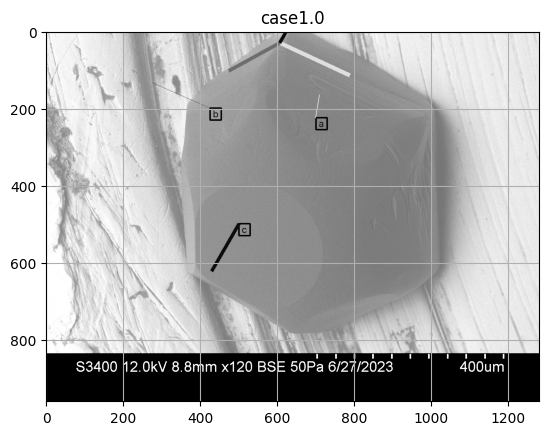

In [18]:
# Show the image
im = PIL.Image.open(Filename)
draw = PIL.ImageDraw.Draw(im)
filla = 200
fillb = 90
fillc = 10
scale = 200
linewidth = 10

# Specifying the input boxes
Boxesfile = 'Boxes.nml'
Boxes=f90nml.read(Boxesfile) # Reads the locations of the boxes
nx1list=Boxes['Boxes']['nx1list']
ny1list=Boxes['Boxes']['ny1list']
labellist=Boxes['Boxes']['labellist']
boxsize=Boxes['Boxes']['boxsize']; print (boxsize)

# Specifying the input crystal vectors
xtlvecsfile = 'Xtlvecs.nml'
xtlvecs=f90nml.read(xtlvecsfile) # Reads the Euler angles specifying the orientation of the crystal
xorigin=xtlvecs['Xtlvecs']['xorigin']
yorigin=xtlvecs['Xtlvecs']['yorigin']
avec=xtlvecs['Xtlvecs']['avec']; avec = np.matrix(avec).T
bvec=xtlvecs['Xtlvecs']['bvec']; bvec = np.matrix(bvec).T
cvec=xtlvecs['Xtlvecs']['cvec']; cvec = np.matrix(cvec).T

# Draw the vectors
linea = [xorigin,yorigin,xorigin+avec[0]*scale,yorigin+avec[1]*scale]
lineb = [xorigin,yorigin,xorigin+bvec[0]*scale,yorigin+bvec[1]*scale]
linec = [xorigin,yorigin,xorigin+cvec[0]*scale,yorigin+cvec[1]*scale]
draw.line(linea, fill=filla,width=linewidth)
draw.line(lineb, fill=fillb,width=linewidth)
draw.line(linec, fill=fillc,width=linewidth)

# Packaging these values for subsequent use
nboxes = len(nx1list); print ("nboxes =", nboxes)
nx2list = np.array(nx1list)+boxsize; print(nx2list)
ny2list = np.array(ny1list)+boxsize; print(ny2list)

# Show the boxes
for i in range(nboxes):
    nx1 = nx1list[i]
    nx2 = nx2list[i]
    ny1 = ny1list[i]
    ny2 = ny2list[i]
    ims.myrectanglelabel(draw,(nx1,ny1),(nx2,ny2),labellist[i])
plt.figure()    
plt.title(imageroot)

# Calculate and show the basal normal
ndvec = -cvec; print ('unit normal basal facet =\n',ndvec)
dboxcenterx = nx1list[2]
dboxcentery = ny1list[2]
scaledcenterxterm = (dboxcenterx+ndvec[0]*scale).item()
scaledcenteryterm = (dboxcentery+ndvec[1]*scale).item()
lined_disp = list(np.squeeze([dboxcenterx,dboxcentery,scaledcenterxterm,scaledcenteryterm]).astype(int))
draw.line(lined_disp, fill=fillc,width=linewidth)

# Calculate and show the prismatic normal associated with vector a
navec = np.matrix(np.cross(cvec.T,avec.T)).T
print ('unit normal a-prismatic facet =\n',navec)
# scalednavecxterm = (xorigin+navec[0]*scale).item()
# scalednavecyterm = (yorigin+navec[1]*scale).item()
# linea_disp = list(np.squeeze([xorigin,yorigin,scalednavecxterm,scalednavecyterm).astype(int))
# draw.line(linea_disp, fill=filla,width=2)

# Calculate and show the prismatic normal associated with vector b
nbvec = np.matrix(np.cross(bvec.T,cvec.T)).T
print ('unit normal b-prismatic facet =\n',nbvec)
bboxcenterx = nx1list[1]
bboxcentery = ny1list[1]
# scaledbvecxterm = (bboxcenterx+nbvec[0]*scale).item()
# scaledbvecyterm = (bboxcentery+nbvec[1]*scale).item()
# lineb_disp = list(np.squeeze([bboxcenterx,bboxcentery,scaledbvecxterm,scaledbvecyterm]).astype(int))
# draw.line(lineb_disp, fill=fillb,width=2)

# Calculate and show the pyramidal normal associated with vector a
Rot28 = ims.myrotation_matrix(avec,-28)
navec = Rot28*navec
print ('unit normal a-pyramidal facet =\n',navec)
aboxcenterx = nx1list[0]
aboxcentery = ny1list[0]
scaledcenterxterm = (aboxcenterx+navec[0]*scale).item()
scaledcenteryterm = (aboxcentery+navec[1]*scale).item()
linea_disp = list(np.squeeze([aboxcenterx,aboxcentery,scaledcenterxterm,scaledcenteryterm]).astype(int))
draw.line(linea_disp, fill=filla,width=2)

# Calculate and show the pyramidal normal associated with vector b
Rot28 = ims.myrotation_matrix(bvec,28)
nbvec = Rot28*nbvec
print ('unit normal b-pyramidal facet =\n',nbvec)
bboxcenterx = nx1list[1]
bboxcentery = ny1list[1]
scaledbvecxterm = (bboxcenterx+nbvec[0]*scale).item()
scaledbvecyterm = (bboxcentery+nbvec[1]*scale).item()
lineb_disp = list(np.squeeze([bboxcenterx,bboxcentery,scaledbvecxterm,scaledbvecyterm]).astype(int))
draw.line(lineb_disp, fill=fillb,width=2)

# Finish up
plt.imshow(im,cmap = 'Greys_r', vmin = 0,vmax = 255)
plt.grid(True)

In [19]:
# For each detector, get s-values
sAa, sBa, sCa, sDa = ims.mygets(navec,theta)
sAb, sBb, sCb, sDb = ims.mygets(nbvec,theta)
sAd, sBd, sCd, sDd = ims.mygets(ndvec,theta)
slistA = np.squeeze(np.array([sAa, sAb, sAd]))
slistB = np.squeeze(np.array([sBa, sBb, sBd]))
slistC = np.squeeze(np.array([sCa, sCb, sCd]))
slistD = np.squeeze(np.array([sDa, sDb, sDd]))

# # For each detector, get s-values
# sAa, sBa, sCa, sDa = ims.mygets(navec,theta)
# sAb, sBb, sCb, sDb = ims.mygets(nbvec,theta)
# sAd, sBd, sCd, sDd = ims.mygets(ndvec,theta)
# slistA = np.squeeze(np.array([sAa, sAb, sAd]))
# slistB = np.squeeze(np.array([sBa, sBb, sBd]))
# slistC = np.squeeze(np.array([sCa, sCb, sCd]))
# slistD = np.squeeze(np.array([sDa, sDb, sDd]))

# Extract the observed intensities
cA_obs = []
cB_obs = []
cC_obs = []
cD_obs = []
for isegment in range(nboxes):
    nx1=nx1list[isegment]; nx2=nx2list[isegment] 
    ny1=ny1list[isegment]; ny2=ny2list[isegment]
    cA_obs.append(np.mean(cA[ny1:ny2,nx1:nx2].astype('float')))
    cB_obs.append(np.mean(cB[ny1:ny2,nx1:nx2].astype('float')))
    cC_obs.append(np.mean(cC[ny1:ny2,nx1:nx2].astype('float')))
    cD_obs.append(np.mean(cD[ny1:ny2,nx1:nx2].astype('float')))

pA = 109.1225478432048 , 116.12937832290054
pB = 80.8334652111339 , 74.92402698606936
pC = 100.81494015745342 , 83.28368678242053
pD = 112.45271654265032 , 96.08272210478579


Text(0.5, 1.0, 'case1.0')

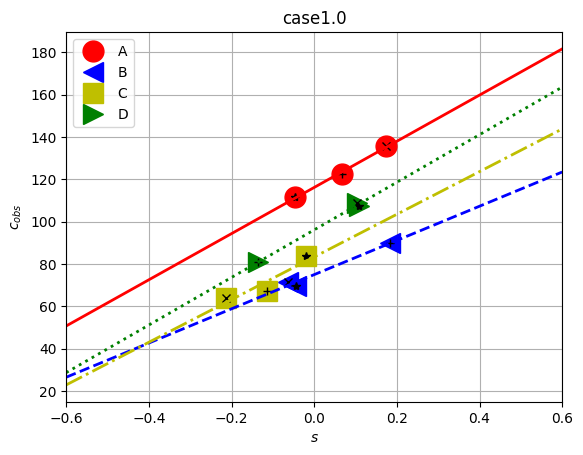

In [20]:
# See what the A-D detector parameters look like graphically
plt.figure()
markersize = 10
plt.plot(slistA,cA_obs,'or',markersize=15)
plt.plot(slistB,cB_obs,'<b',markersize=15)
plt.plot(slistC,cC_obs,'sy',markersize=15)
plt.plot(slistD,cD_obs,'>g',markersize=15)
plt.legend(['A', 'B', 'C', 'D'],loc='upper left')
plt.plot(slistA[0],cA_obs[0],'k*')
plt.plot(slistA[1],cA_obs[1],'kx')
plt.plot(slistA[2],cA_obs[2],'k+')
plt.plot(slistB[0],cB_obs[0],'k*')
plt.plot(slistB[1],cB_obs[1],'kx')
plt.plot(slistB[2],cB_obs[2],'k+')
plt.plot(slistC[0],cC_obs[0],'k*')
plt.plot(slistC[1],cC_obs[1],'kx')
plt.plot(slistC[2],cC_obs[2],'k+')
plt.plot(slistD[0],cD_obs[0],'k*')
plt.plot(slistD[1],cD_obs[1],'kx')
plt.plot(slistD[2],cD_obs[2],'k+')
plt.grid()
srange = [-.6,.6]
plt.xlim(srange)
plt.xlabel('$s$')
plt.ylabel('$c_{obs}$')


# Fitting
maxorder = 1
order = min(len(slistA)-1,maxorder)
pA = np.polyfit(slistA,cA_obs,order); print('pA =', pA[0], ',', pA[1])
pB = np.polyfit(slistB,cB_obs,order); print('pB =', pB[0], ',', pB[1])
pC = np.polyfit(slistC,cC_obs,order); print('pC =', pC[0], ',', pC[1])
pD = np.polyfit(slistD,cD_obs,order); print('pD =', pD[0], ',', pD[1])
s_theory = np.linspace(srange[0],srange[1])
cA_theory = np.polyval(pA,s_theory)
cB_theory = np.polyval(pB,s_theory)
cC_theory = np.polyval(pC,s_theory)
cD_theory = np.polyval(pD,s_theory)
plt.plot(s_theory,cA_theory,'-r',linewidth=2)
plt.plot(s_theory,cB_theory,'--b',linewidth=2)
plt.plot(s_theory,cC_theory,'-.y',linewidth=2)
plt.plot(s_theory,cD_theory,':g',linewidth=2)
plt.title(imageroot)

In [21]:
# Save the calibration file
Calibrationfile = 'Calibration.nml'
cfile = open(Calibrationfile,'w')
cfile.write('&Calibration\n')
cfile.write('   '+'pA = '+str(pA[0])+',  '+str(pA[1])+'\n')
cfile.write('   '+'pB = '+str(pB[0])+',  '+str(pB[1])+'\n')
cfile.write('   '+'pC = '+str(pC[0])+',  '+str(pC[1])+'\n')
cfile.write('   '+'pD = '+str(pD[0])+',  '+str(pD[1])+'\n')
cfile.write('/ \n')
cfile.close()

In [22]:
#cA exploring how images are organized
# cArow0= cA[0,:]
# cBcolumn0=cB[:,300]
# print(np.shape(cA))
# plt.figure()
# plt.title('column0')
# plt.plot(cBcolumn0)
# plt.grid(True)
# plt.figure()
# plt.title('row0')
# plt.plot(cArow0)